# Importing Data & Simple Edits

In [1]:
import psycopg2
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, roc_auc_score

In [2]:
params = {
    "host": "localhost",
    "user": "postgres",
    "port": 5432,
    "password": "336991" 
}
connection = psycopg2.connect(**params, dbname= "istdsa")

In [3]:
train = pd.read_sql("select * from project03.train;", connection)
train

/var/folders/6z/81ycht5s235dy_6ymmclw8p00000gn/T/ipykernel_19062/3910403711.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  train = pd.read_sql("select * from project03.train;", connection)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,280,2019-01-04 08:20:54.103,2019-01-04 08:25:34.838,3269,Brunswick & 6th,40.726012,-74.050389,3186,Grove St PATH,40.719586,-74.043117,29294,Subscriber,1978,1
12996,305,2019-01-04 08:23:09.814,2019-01-04 08:28:15.444,3269,Brunswick & 6th,40.726012,-74.050389,3185,City Hall,40.717732,-74.043845,29549,Subscriber,1971,1
12997,307,2019-01-04 08:24:02.718,2019-01-04 08:29:10.622,3269,Brunswick & 6th,40.726012,-74.050389,3273,Manila & 1st,40.721651,-74.042884,26245,Subscriber,1976,1
12998,1013,2019-01-04 08:24:51.564,2019-01-04 08:41:45.440,3269,Brunswick & 6th,40.726012,-74.050389,3186,Grove St PATH,40.719586,-74.043117,29127,Subscriber,1982,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             13000 non-null  int64         
 1   starttime                13000 non-null  datetime64[ns]
 2   stoptime                 13000 non-null  datetime64[ns]
 3   start station id         13000 non-null  int64         
 4   start station name       13000 non-null  object        
 5   start station latitude   13000 non-null  float64       
 6   start station longitude  13000 non-null  float64       
 7   end station id           13000 non-null  int64         
 8   end station name         13000 non-null  object        
 9   end station latitude     13000 non-null  float64       
 10  end station longitude    13000 non-null  float64       
 11  bikeid                   13000 non-null  int64         
 12  usertype                 13000 n

In [5]:
train.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude ', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
train.rename(
    columns={"tripduration": "trip_duration", "starttime": "start_time",
             "stoptime": "stop_time", "start station id": "start_station_id",
             "start station name": "start_station_name", "start station latitude": "start_station_latitude",
             "start station longitude": "start_station_longitude", "end station id": "end_station_id",
             "end station name": "end_station_name", "end station latitude ": "end_station_latitude",
             "end station longitude": "end_station_longitude", "bikeid": "bike_id",
             "usertype": "user_type", "birth year": "birth_year"},
    inplace=True)

In [7]:
train['start_hour'] = train['start_time'].dt.hour
train['start_day_of_week'] = train['start_time'].dt.dayofweek
train['stop_hour'] = train['stop_time'].dt.hour
train['stop_day_of_week'] = train['stop_time'].dt.dayofweek

In [8]:
train['birth_year'] = 2023 - train['birth_year']
train.rename(columns={"birth_year": "age"}, inplace=True)

In [9]:
train.gender=train.gender.mask(train.gender == 0, 2)
train.gender=train.gender.mask(train.gender == 1, 0)
train.gender=train.gender.mask(train.gender == 2, 1)

# Final encoding
# Male: 0
# Female: 1

In [10]:
train.user_type.value_counts(normalize=True)

# Target: user_type
# Subscriber: 0
# Customer: 1

Subscriber    0.978846
Customer      0.021154
Name: user_type, dtype: float64

In [11]:
ut_dict = {
    'Subscriber': '0',
    'Customer': '1'
}

train.user_type = train.user_type.map(ut_dict)
train.user_type = train.user_type.astype(int)

In [12]:
train

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,gender,start_hour,start_day_of_week,stop_hour,stop_day_of_week
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,0,30,0,3,1,3,1
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,0,51,1,5,1,5,1
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,0,38,0,10,1,10,1
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,1,54,1,12,1,13,1
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,1,54,1,12,1,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,280,2019-01-04 08:20:54.103,2019-01-04 08:25:34.838,3269,Brunswick & 6th,40.726012,-74.050389,3186,Grove St PATH,40.719586,-74.043117,29294,0,45,0,8,4,8,4
12996,305,2019-01-04 08:23:09.814,2019-01-04 08:28:15.444,3269,Brunswick & 6th,40.726012,-74.050389,3185,City Hall,40.717732,-74.043845,29549,0,52,0,8,4,8,4
12997,307,2019-01-04 08:24:02.718,2019-01-04 08:29:10.622,3269,Brunswick & 6th,40.726012,-74.050389,3273,Manila & 1st,40.721651,-74.042884,26245,0,47,0,8,4,8,4
12998,1013,2019-01-04 08:24:51.564,2019-01-04 08:41:45.440,3269,Brunswick & 6th,40.726012,-74.050389,3186,Grove St PATH,40.719586,-74.043117,29127,0,41,0,8,4,8,4


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_duration            13000 non-null  int64         
 1   start_time               13000 non-null  datetime64[ns]
 2   stop_time                13000 non-null  datetime64[ns]
 3   start_station_id         13000 non-null  int64         
 4   start_station_name       13000 non-null  object        
 5   start_station_latitude   13000 non-null  float64       
 6   start_station_longitude  13000 non-null  float64       
 7   end_station_id           13000 non-null  int64         
 8   end_station_name         13000 non-null  object        
 9   end_station_latitude     13000 non-null  float64       
 10  end_station_longitude    13000 non-null  float64       
 11  bike_id                  13000 non-null  int64         
 12  user_type                13000 n

In [14]:
train.describe()

,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,age,gender,start_hour,start_day_of_week,stop_hour,stop_day_of_week
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,477.701769,3199.929077,40.723249,-74.046154,3276.562231,40.722346,-74.046798,28385.828462,0.021154,41.809923,0.236923,13.943692,2.580231,14.048308,2.580923
std,2517.784330,18.098521,0.007535,0.010457,147.488543,0.006797,0.011093,1544.276806,0.143903,10.056397,0.425211,5.047469,1.768734,5.051391,1.769224
min,61.000000,3183.000000,40.711242,-74.083639,3183.000000,40.709651,-74.083639,17432.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217.000000,3186.000000,40.718489,-74.050656,3192.000000,40.718211,-74.050656,26275.000000,0.000000,34.000000,0.000000,9.000000,1.000000,9.000000,1.000000
50%,302.000000,3195.000000,40.721124,-74.043845,3209.000000,40.721525,-74.044247,29273.000000,0.000000,39.000000,0.000000,15.000000,2.000000,16.000000,2.000000
75%,472.000000,3207.000000,40.727596,-74.038526,3275.000000,40.726012,-74.038526,29526.000000,0.000000,47.000000,0.000000,18.000000,4.000000,18.000000,4.000000
max,187392.000000,3269.000000,40.748716,-74.032108,3694.000000,40.748716,-74.032108,34146.000000,1.000000,135.000000,1.000000,23.000000,6.000000,23.000000,6.000000


In [15]:
test = pd.read_sql("select * from project03.test;", connection)
test

/var/folders/6z/81ycht5s235dy_6ymmclw8p00000gn/T/ipykernel_19062/3551475524.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  test = pd.read_sql("select * from project03.test;", connection)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender
0,184,2019-01-04 11:53:46.348,2019-01-04 11:56:51.275,3269,Brunswick & 6th,40.726012,-74.050389,3211,Newark Ave,40.721525,-74.046305,26208,1983,2
1,17986,2019-01-04 12:25:32.048,2019-01-04 17:25:18.806,3269,Brunswick & 6th,40.726012,-74.050389,3203,Hamilton Park,40.727596,-74.044247,29273,1989,1
2,236,2019-01-04 12:25:56.745,2019-01-04 12:29:52.793,3269,Brunswick & 6th,40.726012,-74.050389,3203,Hamilton Park,40.727596,-74.044247,26255,1970,1
3,232,2019-01-04 15:56:07.295,2019-01-04 16:00:00.039,3269,Brunswick & 6th,40.726012,-74.050389,3186,Grove St PATH,40.719586,-74.043117,26303,1985,1
4,693,2019-01-04 18:44:47.762,2019-01-04 18:56:21.296,3269,Brunswick & 6th,40.726012,-74.050389,3195,Sip Ave,40.730743,-74.063784,29581,1990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6671,853,2019-01-26 06:40:17.332,2019-01-26 06:54:30.888,3694,Jackson Square,40.711130,-74.078900,3183,Exchange Place,40.716247,-74.033459,26293,1977,1
6672,936,2019-01-27 06:36:20.640,2019-01-27 06:51:57.146,3694,Jackson Square,40.711130,-74.078900,3183,Exchange Place,40.716247,-74.033459,26291,1977,1
6673,653,2019-01-27 21:14:08.546,2019-01-27 21:25:01.617,3694,Jackson Square,40.711130,-74.078900,3677,Glenwood Ave,40.727551,-74.071061,26188,1998,2
6674,960,2019-01-29 06:15:26.588,2019-01-29 06:31:26.730,3694,Jackson Square,40.711130,-74.078900,3183,Exchange Place,40.716247,-74.033459,26196,1977,1


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6676 entries, 0 to 6675
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             6676 non-null   int64         
 1   starttime                6676 non-null   datetime64[ns]
 2   stoptime                 6676 non-null   datetime64[ns]
 3   start station id         6676 non-null   int64         
 4   start station name       6676 non-null   object        
 5   start station latitude   6676 non-null   float64       
 6   start station longitude  6676 non-null   float64       
 7   end station id           6676 non-null   int64         
 8   end station name         6676 non-null   object        
 9   end station latitude     6676 non-null   float64       
 10  end station longitude    6676 non-null   float64       
 11  bikeid                   6676 non-null   int64         
 12  birth year               6676 non-

In [17]:
test.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude ', 'end station longitude', 'bikeid',
       'birth year', 'gender'],
      dtype='object')

In [18]:
test.rename(
    columns={"tripduration": "trip_duration", "starttime": "start_time",
             "stoptime": "stop_time", "start station id": "start_station_id",
             "start station name": "start_station_name", "start station latitude": "start_station_latitude",
             "start station longitude": "start_station_longitude", "end station id": "end_station_id",
             "end station name": "end_station_name", "end station latitude ": "end_station_latitude",
             "end station longitude": "end_station_longitude", "bikeid": "bike_id",
             "birth year": "birth_year"},
    inplace=True)

In [19]:
test['start_hour'] = test['start_time'].dt.hour
test['start_day_of_week'] = test['start_time'].dt.dayofweek
test['stop_hour'] = test['stop_time'].dt.hour
test['stop_day_of_week'] = test['stop_time'].dt.dayofweek

In [20]:
test['birth_year'] = 2023 - test['birth_year']
test.rename(columns={"birth_year": "age"}, inplace=True)

In [21]:
test.gender=test.gender.mask(test.gender == 0, 2)
test.gender=test.gender.mask(test.gender == 1, 0)
test.gender=test.gender.mask(test.gender == 2, 1)

In [22]:
test

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,age,gender,start_hour,start_day_of_week,stop_hour,stop_day_of_week
0,184,2019-01-04 11:53:46.348,2019-01-04 11:56:51.275,3269,Brunswick & 6th,40.726012,-74.050389,3211,Newark Ave,40.721525,-74.046305,26208,40,1,11,4,11,4
1,17986,2019-01-04 12:25:32.048,2019-01-04 17:25:18.806,3269,Brunswick & 6th,40.726012,-74.050389,3203,Hamilton Park,40.727596,-74.044247,29273,34,0,12,4,17,4
2,236,2019-01-04 12:25:56.745,2019-01-04 12:29:52.793,3269,Brunswick & 6th,40.726012,-74.050389,3203,Hamilton Park,40.727596,-74.044247,26255,53,0,12,4,12,4
3,232,2019-01-04 15:56:07.295,2019-01-04 16:00:00.039,3269,Brunswick & 6th,40.726012,-74.050389,3186,Grove St PATH,40.719586,-74.043117,26303,38,0,15,4,16,4
4,693,2019-01-04 18:44:47.762,2019-01-04 18:56:21.296,3269,Brunswick & 6th,40.726012,-74.050389,3195,Sip Ave,40.730743,-74.063784,29581,33,1,18,4,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6671,853,2019-01-26 06:40:17.332,2019-01-26 06:54:30.888,3694,Jackson Square,40.711130,-74.078900,3183,Exchange Place,40.716247,-74.033459,26293,46,0,6,5,6,5
6672,936,2019-01-27 06:36:20.640,2019-01-27 06:51:57.146,3694,Jackson Square,40.711130,-74.078900,3183,Exchange Place,40.716247,-74.033459,26291,46,0,6,6,6,6
6673,653,2019-01-27 21:14:08.546,2019-01-27 21:25:01.617,3694,Jackson Square,40.711130,-74.078900,3677,Glenwood Ave,40.727551,-74.071061,26188,25,1,21,6,21,6
6674,960,2019-01-29 06:15:26.588,2019-01-29 06:31:26.730,3694,Jackson Square,40.711130,-74.078900,3183,Exchange Place,40.716247,-74.033459,26196,46,0,6,1,6,1


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6676 entries, 0 to 6675
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_duration            6676 non-null   int64         
 1   start_time               6676 non-null   datetime64[ns]
 2   stop_time                6676 non-null   datetime64[ns]
 3   start_station_id         6676 non-null   int64         
 4   start_station_name       6676 non-null   object        
 5   start_station_latitude   6676 non-null   float64       
 6   start_station_longitude  6676 non-null   float64       
 7   end_station_id           6676 non-null   int64         
 8   end_station_name         6676 non-null   object        
 9   end_station_latitude     6676 non-null   float64       
 10  end_station_longitude    6676 non-null   float64       
 11  bike_id                  6676 non-null   int64         
 12  age                      6676 non-

In [24]:
test.describe()

,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,age,gender,start_hour,start_day_of_week,stop_hour,stop_day_of_week
count,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000
mean,387.017226,3415.437388,40.722442,-74.047922,3253.911474,40.723056,-74.045183,28385.399641,42.045087,0.249700,12.472139,2.686189,12.553925,2.686938
std,871.835493,177.116274,0.005895,0.011196,132.363903,0.006838,0.009632,1538.259146,10.183922,0.432872,5.017569,1.824657,5.030150,1.824416
min,61.000000,3269.000000,40.709651,-74.078900,3183.000000,40.709651,-74.083639,17432.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,192.000000,3273.000000,40.719252,-74.050389,3186.000000,40.719252,-74.048790,26273.000000,35.000000,0.000000,8.000000,1.000000,8.000000,1.000000
50%,281.000000,3279.000000,40.721651,-74.045953,3202.000000,40.721124,-74.043117,29272.000000,39.000000,0.000000,12.000000,3.000000,12.000000,3.000000
75%,413.000000,3639.000000,40.725685,-74.038914,3270.000000,40.727224,-74.038051,29525.000000,47.000000,0.000000,17.000000,4.000000,17.000000,4.000000
max,50862.000000,3694.000000,40.745910,-74.034234,3694.000000,40.748716,-74.032108,34146.000000,79.000000,1.000000,23.000000,6.000000,23.000000,6.000000


# Exploratory Data Analysis & Feature Engineering

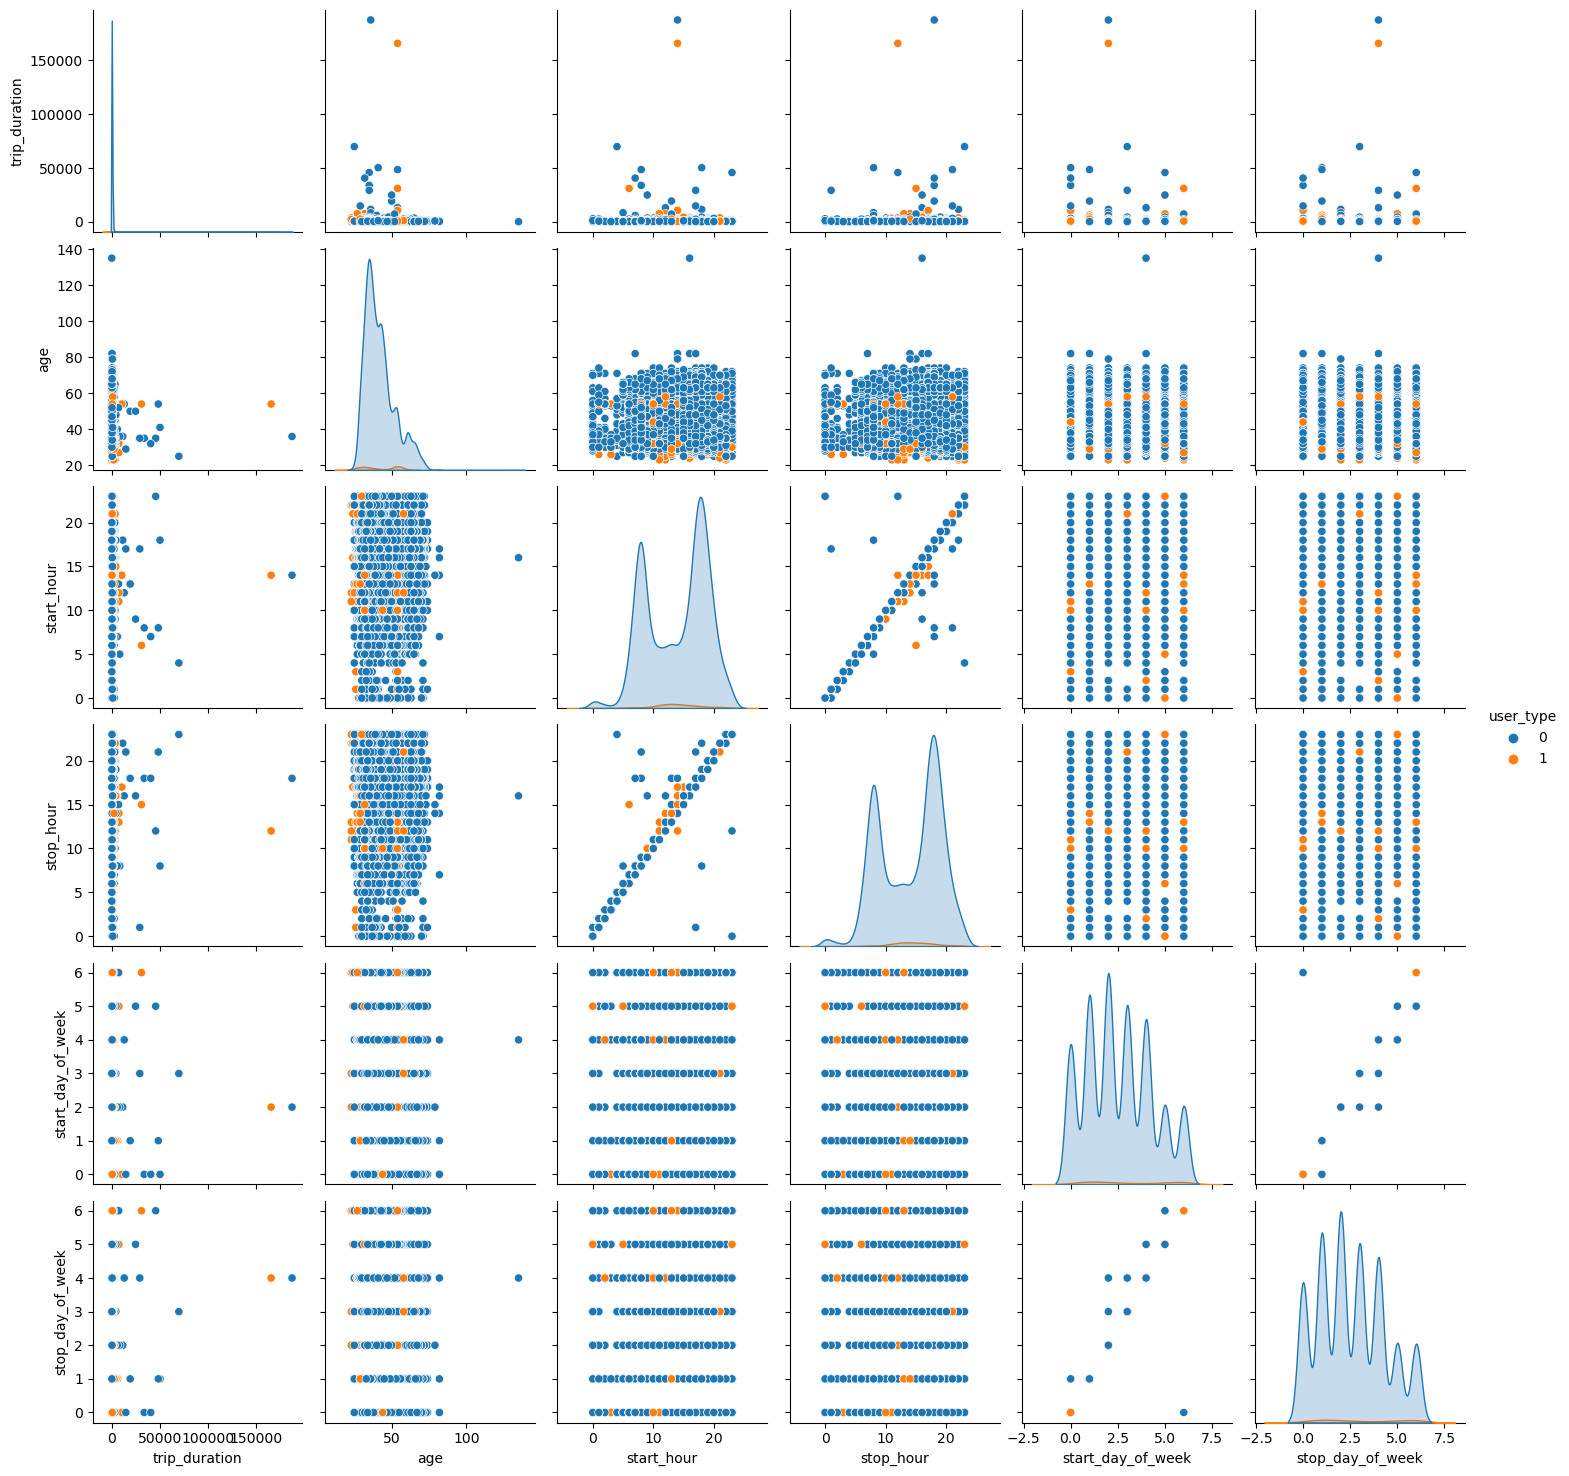

In [25]:
sns.pairplot(train, vars=['trip_duration', 'age', 'start_hour', 'stop_hour', 'start_day_of_week', 'stop_day_of_week'], hue='user_type');

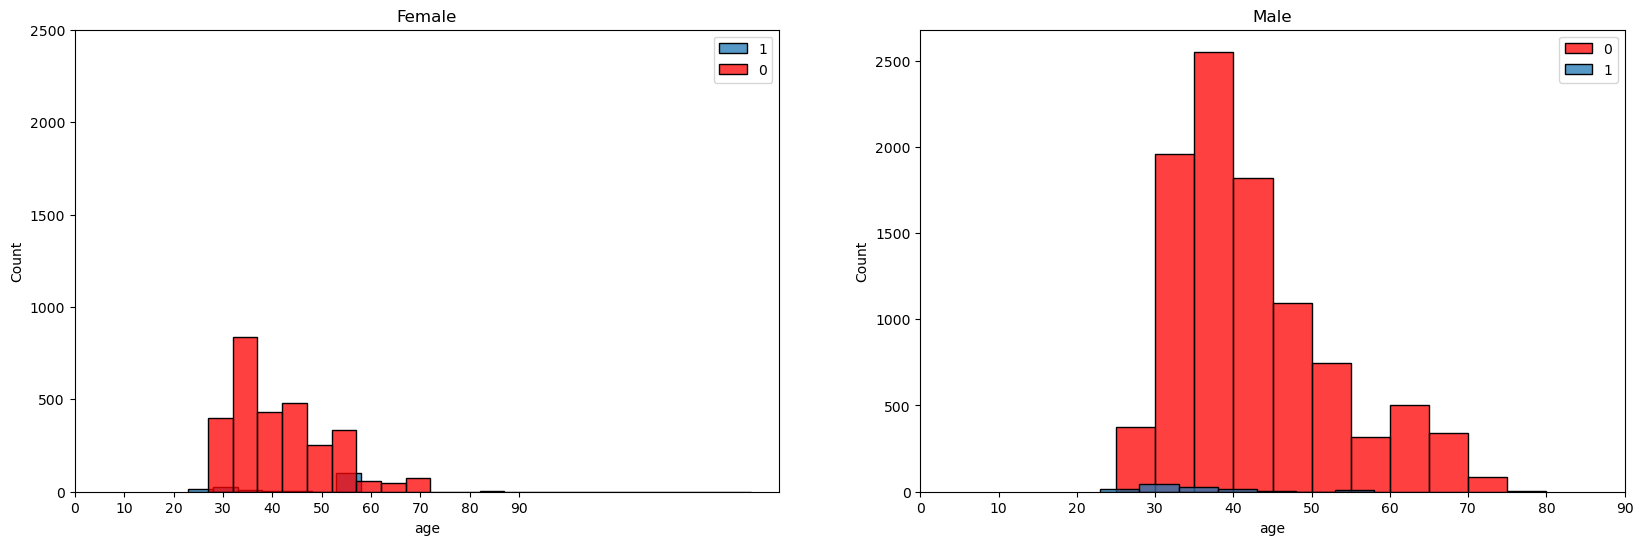

In [26]:
women = train[train['gender']==1]
men = train[train['gender']==0]
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
sns.histplot(women[women['user_type']==1].age, binwidth=5, label=1)
sns.histplot(women[women['user_type']==0].age, binwidth=5, label=0, color='red')
plt.xticks(np.linspace(0,90,10))
plt.yticks(np.linspace(0,2500,6))
plt.legend()
plt.title('Female')

plt.subplot(1,2,2)
sns.histplot(men[men['user_type']==0].age, binwidth=5, label=0, color='red')
sns.histplot(men[men['user_type']==1].age, binwidth=5, label=1)
plt.xticks(np.linspace(0,90,10))
plt.yticks(np.linspace(0,2500,6))
plt.legend()
plt.title('Male');

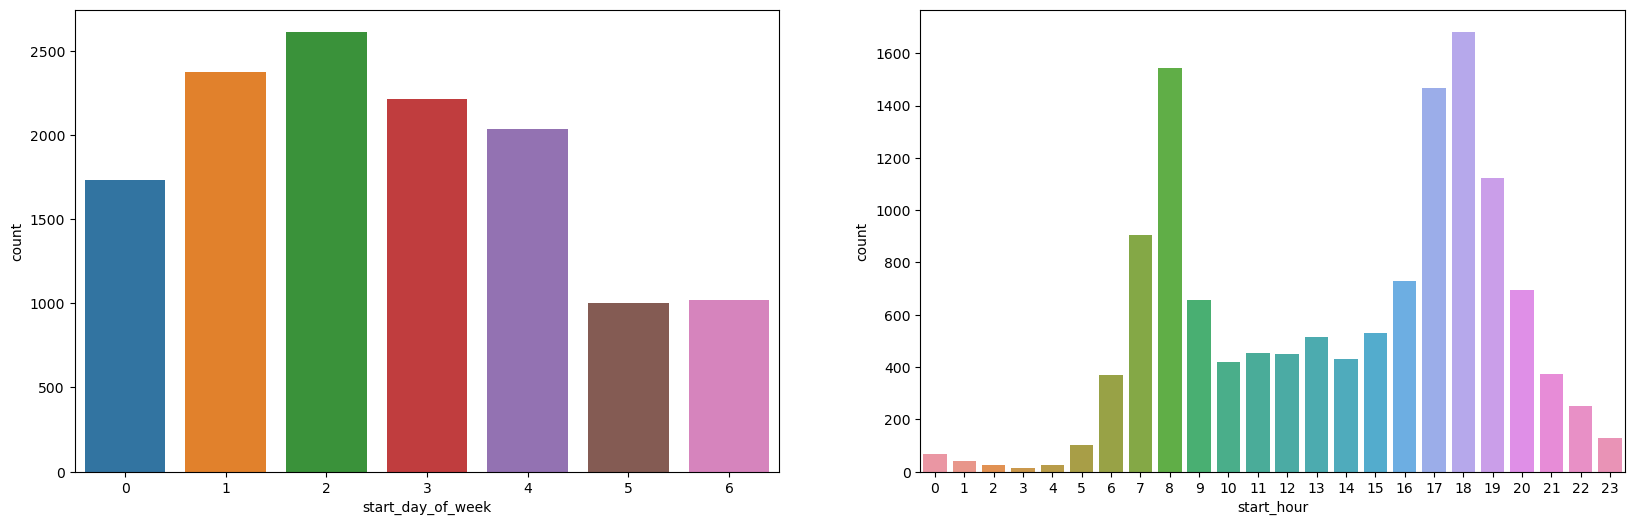

In [27]:
sdow_grouped = pd.DataFrame(train.groupby('start_day_of_week').size(), columns=['count']).reset_index()
sh_grouped = pd.DataFrame(train.groupby('start_hour').size(), columns=['count']).reset_index()
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
sns.barplot(x='start_day_of_week', y='count', data=sdow_grouped);

plt.subplot(1,2,2)
sns.barplot(x='start_hour', y='count', data=sh_grouped);

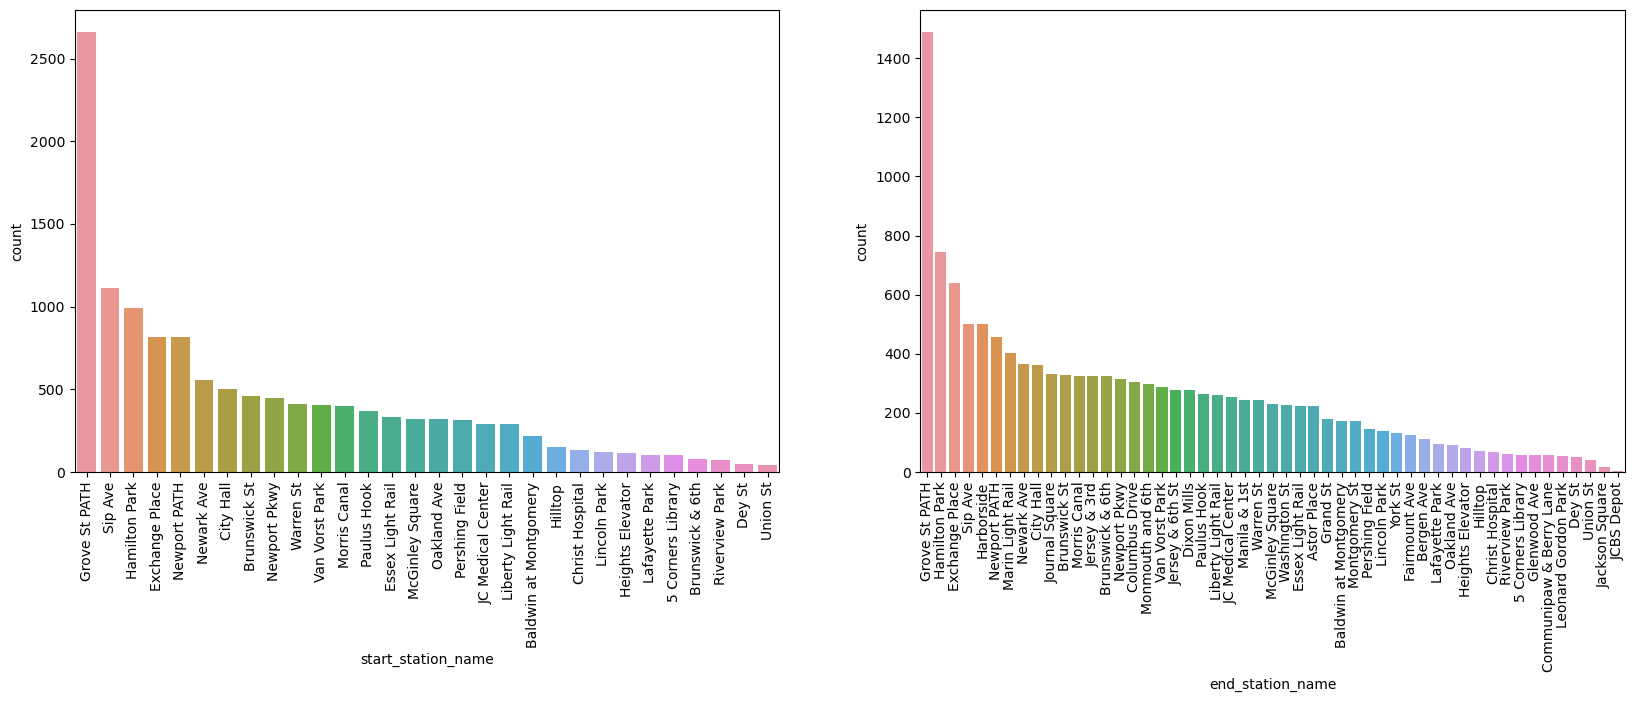

In [28]:
ssn_grouped = pd.DataFrame(train.groupby('start_station_name').size(), columns=['count']).reset_index().sort_values(by='count', ascending=False)
esn_grouped = pd.DataFrame(train.groupby('end_station_name').size(), columns=['count']).reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.xticks(rotation=90, ha='center')
sns.barplot(x='start_station_name', y='count', data=ssn_grouped);

plt.subplot(1,2,2)
plt.xticks(rotation=90, ha='center')
sns.barplot(x='end_station_name', y='count', data=esn_grouped);

In [29]:
data = [train, test]

for dataset in data:
    dataset.drop(columns=['start_time', 'stop_time', 'start_station_name', 'end_station_name', 'bike_id'], inplace=True)

In [30]:
from pyproj import Geod
wgs84_geod = Geod(ellps='WGS84')

def Distance(lat1, lon1, lat2, lon2):
    az12, az21, dist = wgs84_geod.inv(lon1, lat1, lon2, lat2)
    return dist

data = [train, test]

for dataset in data:
    dataset['distance'] = Distance(dataset['start_station_latitude'].tolist(), dataset['start_station_longitude'].tolist(), dataset['end_station_latitude'].tolist(), dataset['end_station_longitude'].tolist())
    dataset['distance'] = dataset['distance'].astype(int)
    dataset.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace=True)

In [31]:
ut_col = train.pop('user_type')
train.insert(0, 'user_type', ut_col)

In [32]:
train

,user_type,trip_duration,start_station_id,end_station_id,age,gender,start_hour,start_day_of_week,stop_hour,stop_day_of_week,distance
0,0,201,3183,3214,30,0,3,1,3,1,462
1,0,505,3183,3638,51,1,5,1,5,1,909
2,0,756,3183,3192,38,0,10,1,10,1,1959
3,1,1575,3183,3638,54,1,12,1,13,1,909
4,1,1566,3183,3638,54,1,12,1,13,1,909
...,...,...,...,...,...,...,...,...,...,...,...
12995,0,280,3269,3186,45,0,8,4,8,4,941
12996,0,305,3269,3185,52,0,8,4,8,4,1072
12997,0,307,3269,3273,47,0,8,4,8,4,797
12998,0,1013,3269,3186,41,0,8,4,8,4,941


In [33]:
filtered_total = train.groupby('age').user_type.count()
filtered_group = train[train.user_type == 1].groupby('age').user_type.count()

In [34]:
user_type_df = pd.concat([filtered_group, filtered_total-filtered_group], axis=1, keys=['1', '0'])
user_type_df.head()

,1,0
age,,
23,5.0,0.0
24,5.0,0.0
25,5.0,29.0
26,5.0,3.0
27,10.0,83.0


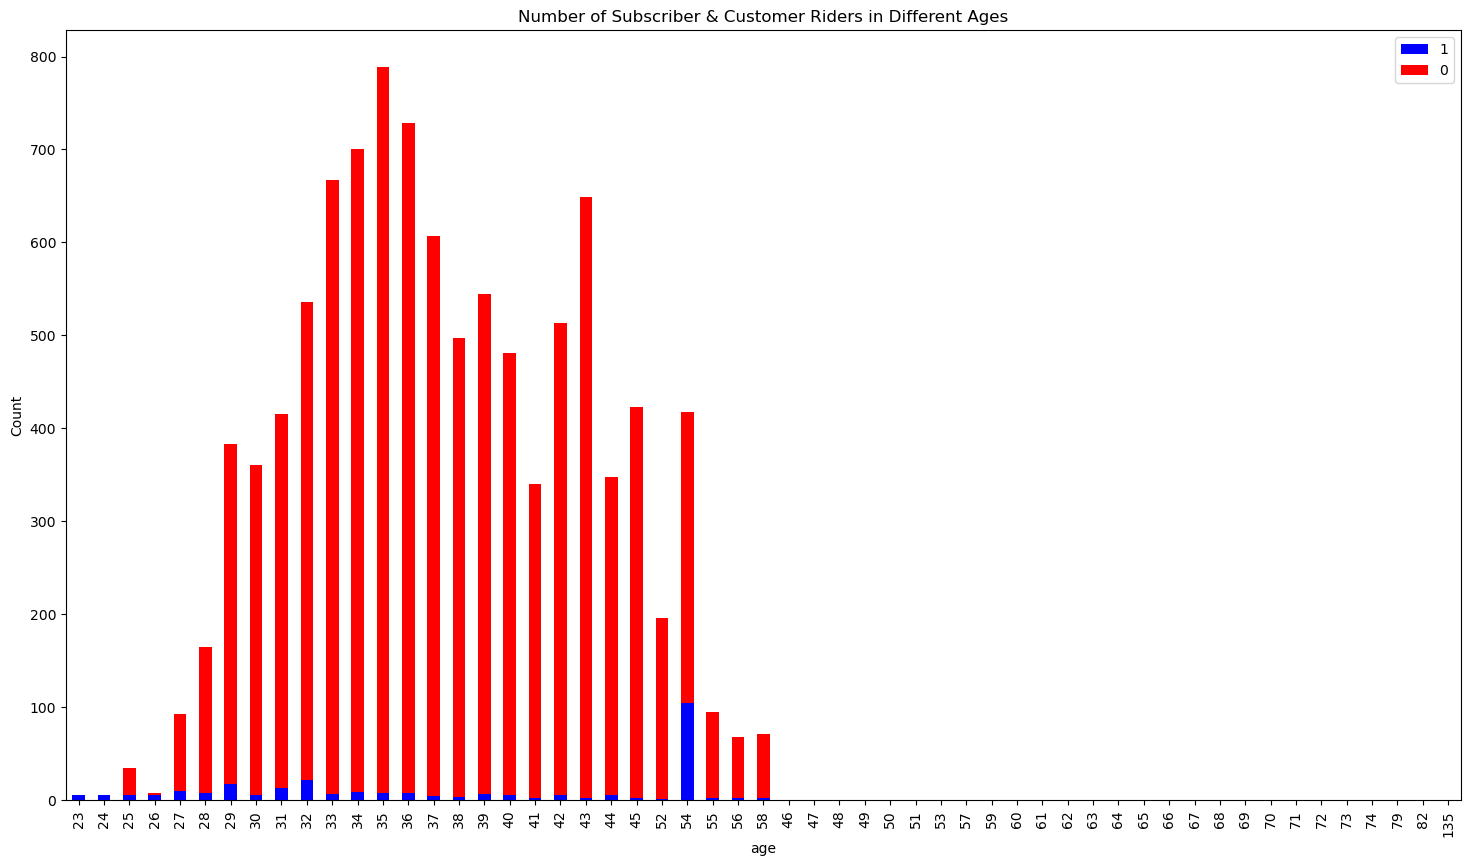

In [35]:
user_type_df.plot(kind='bar', stacked=True, color=['blue','red'], figsize=[18,10],
                title='Number of Subscriber & Customer Riders in Different Ages', ylabel='Count');

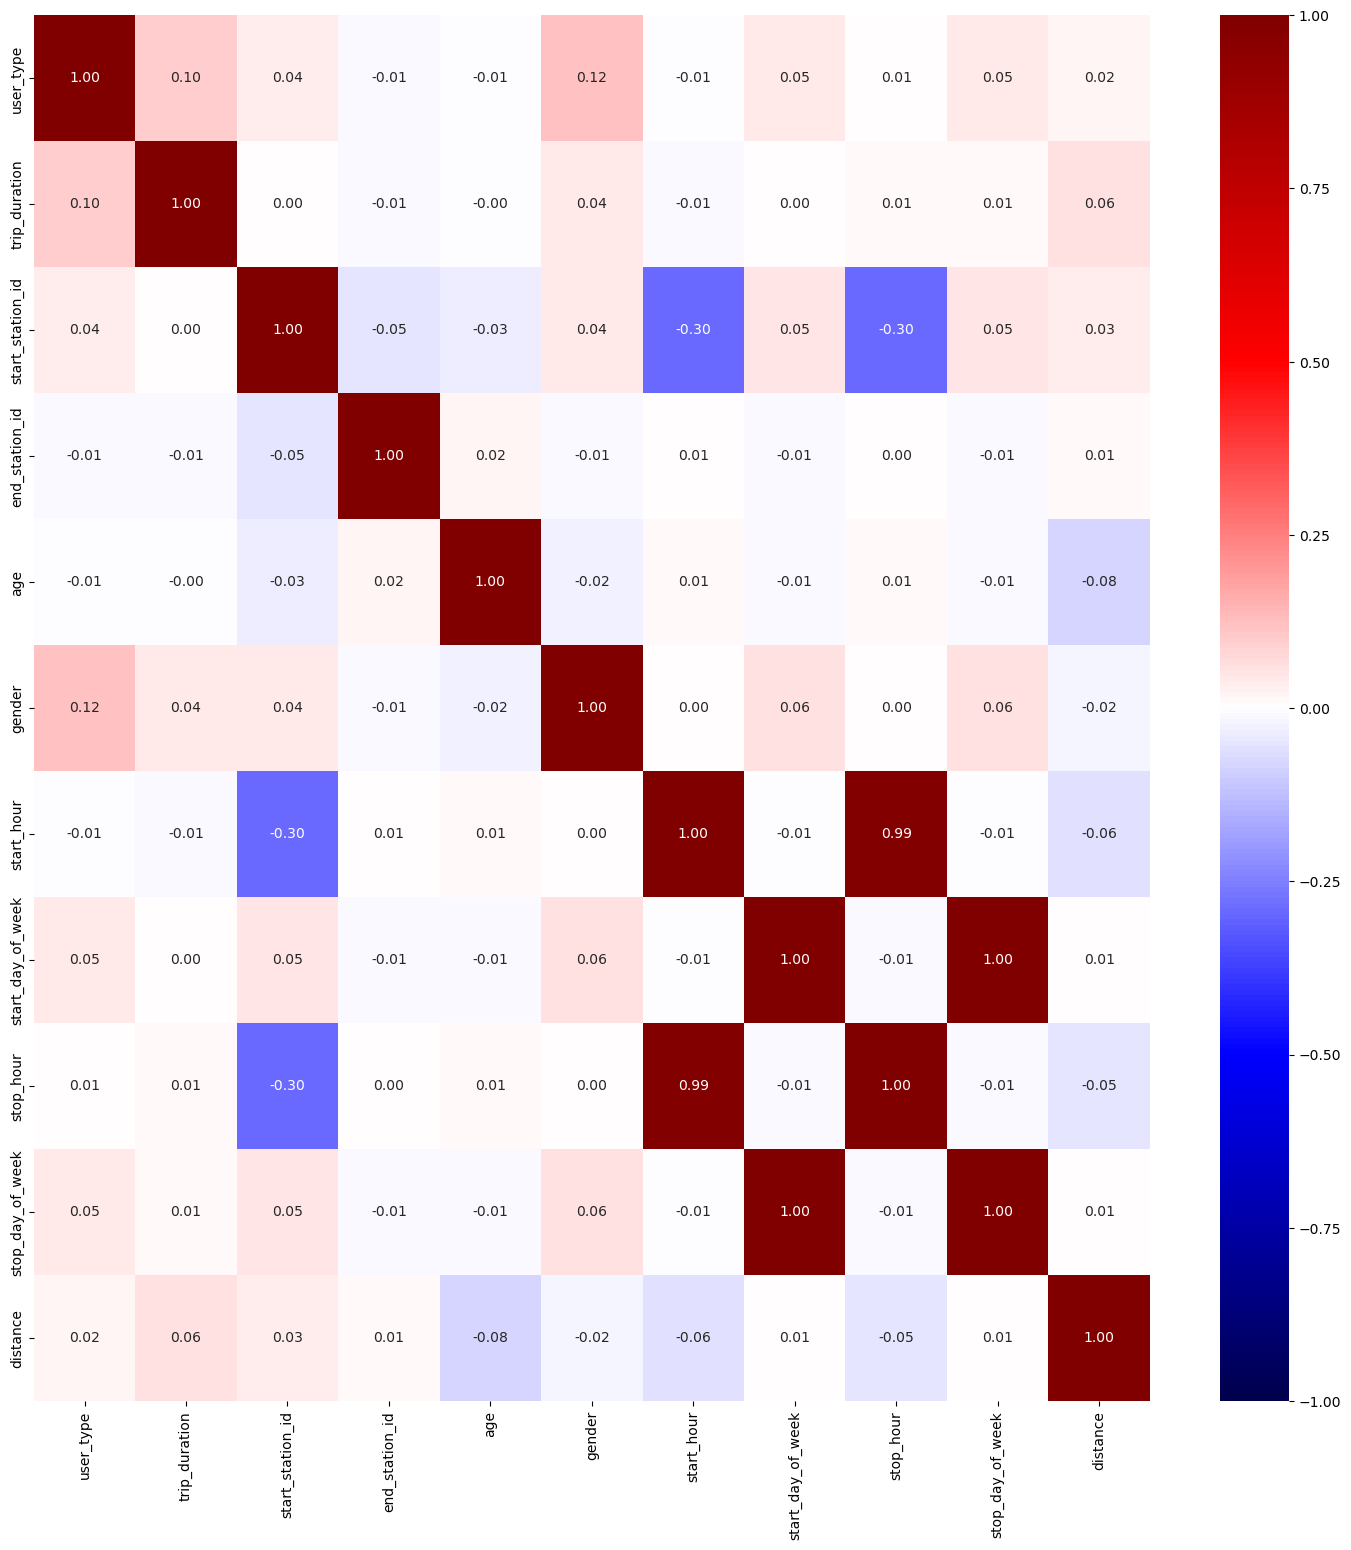

In [36]:
plt.figure(figsize=[18,18])
sns.heatmap(train.corr(), cmap="seismic", annot=True, fmt='.2f', vmin=-1, vmax=1);

In [37]:
data = [train, test]

for dataset in data:
    dataset.drop(columns=['stop_day_of_week', 'stop_hour'], inplace=True)

# Modelling

## Modelling before Sampling

**1. Cross Validation Accuracy Scores before Sampling**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(train.iloc[:,1:], train['user_type'],
                                                    test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

x_train_scaled = std_scale.fit_transform(x_train)
x_test_scaled = std_scale.transform(x_test)

In [40]:
logreg = LogisticRegression(solver='liblinear')

acc_logreg = cross_val_score(logreg, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_logreg

array([0.97836538, 0.97884615, 0.97932692, 0.97836538, 0.97836538])

In [41]:
knn = KNeighborsClassifier()

acc_knn = cross_val_score(knn, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_knn

array([0.97788462, 0.97836538, 0.97980769, 0.97932692, 0.97980769])

In [42]:
dt = DecisionTreeClassifier() 

acc_dt = cross_val_score(dt, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_dt

array([0.98221154, 0.97836538, 0.97259615, 0.97596154, 0.97980769])

In [43]:
rf = RandomForestClassifier()

acc_rf = cross_val_score(rf, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_rf

array([0.98605769, 0.98413462, 0.98846154, 0.98365385, 0.9875    ])

In [44]:
xgboost = XGBClassifier()

acc_xgboost = cross_val_score(xgboost, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_xgboost

array([0.98605769, 0.98509615, 0.98894231, 0.98461538, 0.98653846])

In [45]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Cross Validated Score (Mean)': [acc_logreg.mean(), acc_knn.mean(),
                                     acc_dt.mean(), acc_rf.mean(), acc_xgboost.mean()],
    'Cross Validated Score (Std)': [acc_logreg.std(), acc_knn.std(),
                                     acc_dt.std(), acc_rf.std(), acc_xgboost.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
XGBoost,98.62,0.15
Random Forest,98.60,0.19
KNN,97.90,0.08
Logistic Regression,97.87,0.04
Decision Tree,97.78,0.33


**2. Testing Confussion Matrices before Sampling**

In [46]:
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(x_test_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Subscriber', 'Customer'],
           yticklabels=['Subscriber', 'Customer']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

In [47]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train_scaled, y_train)

logreg.score(x_test_scaled, y_test)

0.9796153846153847

In [48]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(logreg, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

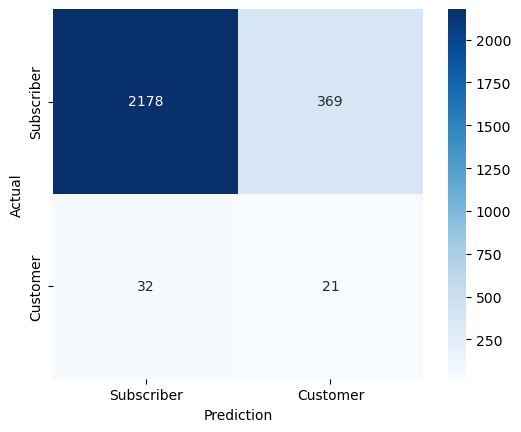

In [49]:
make_confusion_matrix(logreg, threshold=0.04)

In [50]:
logreg_threshold = 0.04
y_pred = (logreg.predict_proba(x_test_scaled)[:,1] >= logreg_threshold)

logreg_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
logreg_scores.index = ["logreg"]
logreg_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

logreg_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
logreg,0.845769,0.396226,0.053846,0.094808,0.625675


In [51]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

knn.score(x_test_scaled, y_test)

0.9823076923076923

In [52]:
interactive(lambda threshold: make_confusion_matrix(knn, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

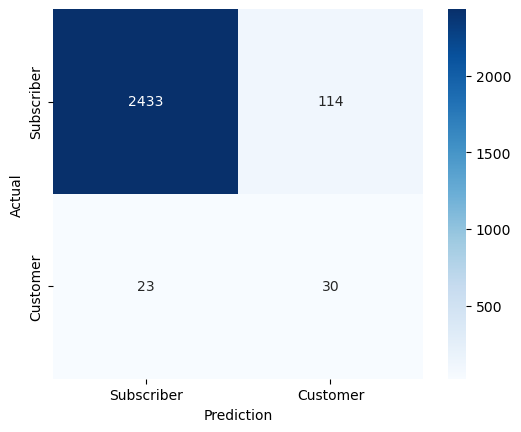

In [53]:
make_confusion_matrix(knn, threshold=0.2)

In [54]:
knn_threshold = 0.04
y_pred = (knn.predict_proba(x_test_scaled)[:,1] >= knn_threshold)

knn_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
knn_scores.index = ["knn"]
knn_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

knn_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
knn,0.947308,0.566038,0.208333,0.304569,0.76064


In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)

dt.score(x_test_scaled, y_test)

0.9811538461538462

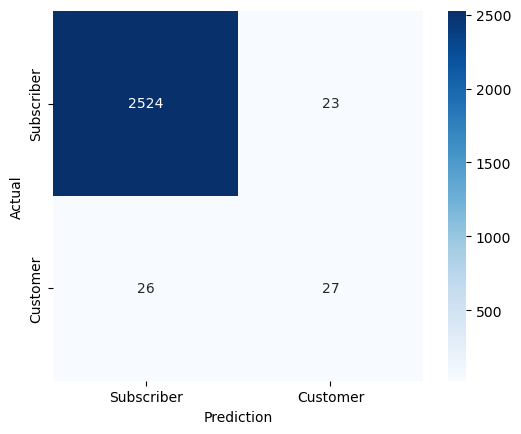

In [56]:
make_confusion_matrix(dt)

In [57]:
y_pred = (dt.predict_proba(x_test_scaled)[:,1])

dt_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
dt_scores.index = ["dt"]
dt_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

dt_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
dt,0.981154,0.509434,0.54,0.524272,0.750202


In [58]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

rf.score(x_test_scaled, y_test)

0.9853846153846154

In [59]:
interactive(lambda threshold: make_confusion_matrix(rf, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

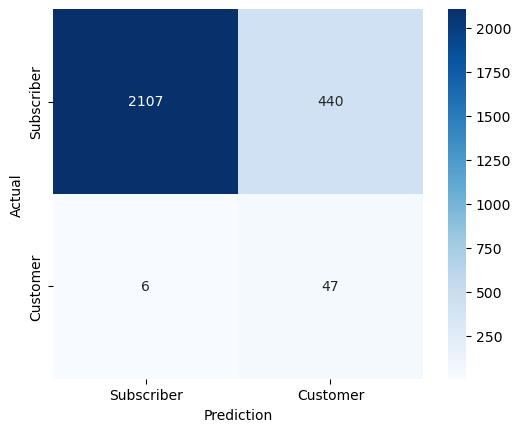

In [60]:
make_confusion_matrix(rf, threshold=0.02)

In [61]:
rf_threshold = 0.02
y_pred = (rf.predict_proba(x_test_scaled)[:,1] >= rf_threshold)

rf_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
rf_scores.index = ["rf"]
rf_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

rf_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
rf,0.828462,0.886792,0.096509,0.174074,0.85702


In [62]:
xgboost = XGBClassifier()
xgboost.fit(x_train_scaled, y_train)

xgboost.score(x_test_scaled, y_test)

0.9861538461538462

In [63]:
interactive(lambda threshold: make_confusion_matrix(xgboost, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

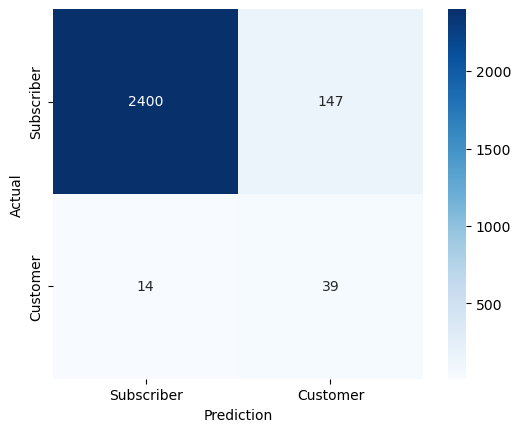

In [64]:
make_confusion_matrix(xgboost, threshold=0.01)

In [65]:
xgboost_threshold = 0.01
y_pred = (xgboost.predict_proba(x_test_scaled)[:,1] >= xgboost_threshold)

xgboost_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
xgboost_scores.index = ["xgboost"]
xgboost_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

xgboost_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
xgboost,0.938077,0.735849,0.209677,0.32636,0.839067


## Modelling after Random Oversampling

In [66]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x_train_scaled, y_train)

In [67]:
Counter(y_resampled)

Counter({0: 10178, 1: 10178})

**1. Cross Validation Accuracy Scores after Random Oversampling**

In [68]:
logreg2 = LogisticRegression(solver='liblinear')

acc_logreg2 = cross_val_score(logreg2, x_resampled, y_resampled, cv=5, scoring='accuracy')
acc_logreg2

array([0.78904715, 0.77573078, 0.79243429, 0.77622206, 0.76762466])

In [69]:
knn2 = KNeighborsClassifier()

acc_knn2 = cross_val_score(knn2, x_resampled, y_resampled, cv=5, scoring='accuracy')
acc_knn2

array([0.97937132, 0.98034881, 0.98157701, 0.98575289, 0.98133137])

In [70]:
dt2 = DecisionTreeClassifier() 

acc_dt2 = cross_val_score(dt2, x_resampled, y_resampled, cv=5, scoring='accuracy')
acc_dt2

array([0.99582515, 0.99312208, 0.99189388, 0.9963154 , 0.99484156])

In [71]:
rf2 = RandomForestClassifier()

acc_rf2 = cross_val_score(rf2, x_resampled, y_resampled, cv=5, scoring='accuracy')
acc_rf2

array([0.99950884, 0.99975436, 0.9987718 , 0.99950872, 0.99828052])

In [72]:
xgboost2 = XGBClassifier()

acc_xgboost2 = cross_val_score(xgboost2, x_resampled, y_resampled, cv=5, scoring='accuracy')
acc_xgboost2

array([0.99557957, 0.99606976, 0.99557848, 0.9987718 , 0.99533284])

In [73]:
results2 = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Cross Validated Score (Mean)': [acc_logreg2.mean(), acc_knn2.mean(),
                                     acc_dt2.mean(), acc_rf2.mean(), acc_xgboost2.mean()],
    'Cross Validated Score (Std)': [acc_logreg2.std(), acc_knn2.std(),
                                     acc_dt2.std(), acc_rf2.std(), acc_xgboost2.std()]})

result_df2 = results2.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df2 = result_df2.set_index('Model')
result_df2['Cross Validated Score (Mean)'] = (result_df2['Cross Validated Score (Mean)']*100).round(2)
result_df2['Cross Validated Score (Std)'] = (result_df2['Cross Validated Score (Std)']*100).round(2)
result_df2

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Random Forest,99.92,0.06
XGBoost,99.63,0.13
Decision Tree,99.44,0.17
KNN,98.17,0.22
Logistic Regression,78.02,0.92


**2. Testing Confussion Matrices after Random Oversampling**

In [74]:
logreg2 = LogisticRegression(solver='liblinear')
logreg2.fit(x_resampled, y_resampled)

logreg2.score(x_test_scaled, y_test)

0.8065384615384615

In [75]:
interactive(lambda threshold: make_confusion_matrix(logreg2, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

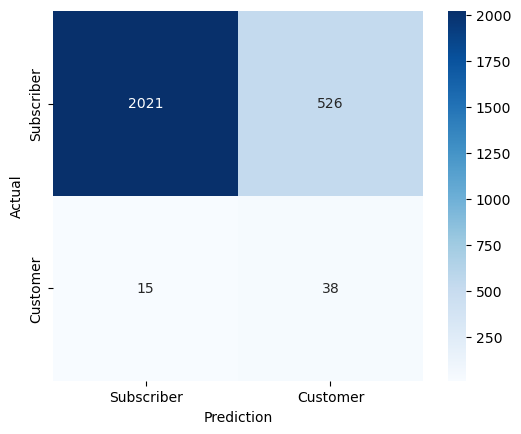

In [76]:
make_confusion_matrix(logreg2, threshold=0.48)

In [77]:
logreg2_threshold = 0.48
y_pred = (logreg2.predict_proba(x_test_scaled)[:,1] >= logreg2_threshold)

logreg2_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
logreg2_scores.index = ["logreg2"]
logreg2_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

logreg2_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
logreg2,0.791923,0.716981,0.067376,0.123177,0.755232


In [78]:
knn2 = KNeighborsClassifier()
knn2.fit(x_resampled, y_resampled)

knn2.score(x_test_scaled, y_test)

0.9615384615384616

In [79]:
interactive(lambda threshold: make_confusion_matrix(knn2, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

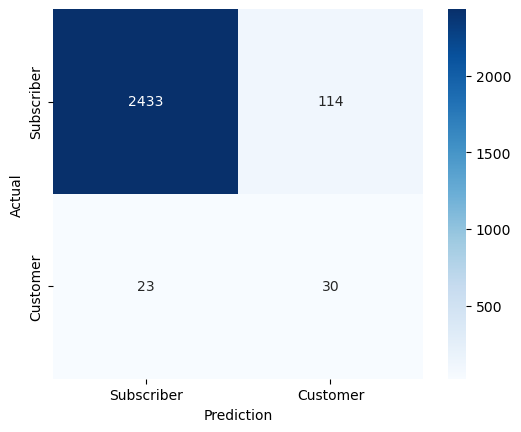

In [80]:
make_confusion_matrix(knn2, threshold=0.2)

In [81]:
knn2_threshold = 0.2
y_pred = (knn2.predict_proba(x_test_scaled)[:,1] >= knn2_threshold)

knn2_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
knn2_scores.index = ["knn2"]
knn2_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

knn2_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
knn2,0.947308,0.566038,0.208333,0.304569,0.76064


In [82]:
dt2 = DecisionTreeClassifier()
dt2.fit(x_resampled, y_resampled)

dt2.score(x_test_scaled, y_test)

0.98

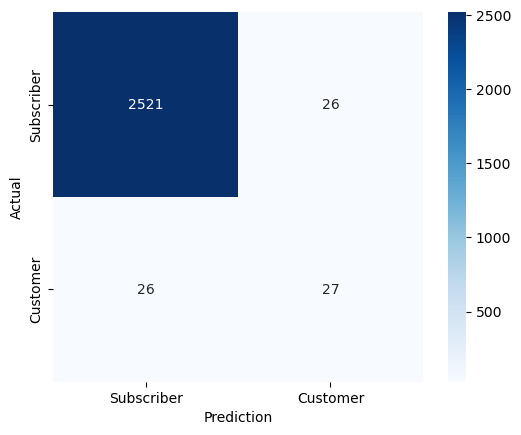

In [83]:
make_confusion_matrix(dt2)

In [84]:
y_pred = (dt2.predict_proba(x_test_scaled)[:,1])

dt2_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
dt2_scores.index = ["dt2"]
dt2_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

dt2_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
dt2,0.98,0.509434,0.509434,0.509434,0.749613


In [85]:
rf2 = RandomForestClassifier()
rf2.fit(x_resampled, y_resampled)

rf2.score(x_test_scaled, y_test)

0.9842307692307692

In [86]:
interactive(lambda threshold: make_confusion_matrix(rf2, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

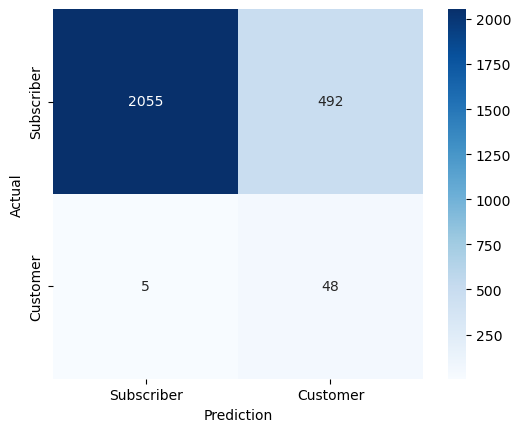

In [87]:
make_confusion_matrix(rf2, threshold=0.02)

In [88]:
rf2_threshold = 0.02
y_pred = (rf2.predict_proba(x_test_scaled)[:,1] >= rf2_threshold)

rf2_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
rf2_scores.index = ["rf2"]
rf2_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

rf2_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
rf2,0.808846,0.90566,0.088889,0.161889,0.856246


In [89]:
xgboost2 = XGBClassifier()
xgboost2.fit(x_resampled, y_resampled)

xgboost2.score(x_test_scaled, y_test)

0.9823076923076923

In [90]:
interactive(lambda threshold: make_confusion_matrix(xgboost2, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

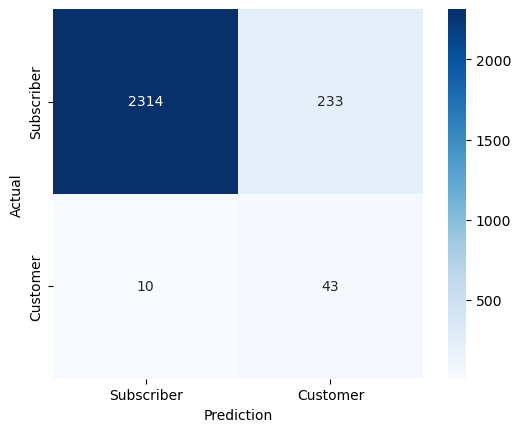

In [91]:
make_confusion_matrix(xgboost2, threshold=0.01)

In [92]:
xgboost2_threshold = 0.01
y_pred = (xgboost2.predict_proba(x_test_scaled)[:,1] >= xgboost2_threshold)

xgboost2_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
xgboost2_scores.index = ["xgboost2"]
xgboost2_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

xgboost2_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
xgboost2,0.906538,0.811321,0.155797,0.261398,0.85992


## Modelling after SMOTE

In [93]:
from imblearn.over_sampling import SMOTE

x_smoted, y_smoted = SMOTE().fit_resample(x_train_scaled, y_train)

In [94]:
Counter(y_smoted)

Counter({0: 10178, 1: 10178})

**1. Cross Validation Accuracy Scores after SMOTE**

In [95]:
logreg3 = LogisticRegression(solver='liblinear')

acc_logreg3 = cross_val_score(logreg3, x_smoted, y_smoted, cv=5, scoring='accuracy')
acc_logreg3

array([0.7981336 , 0.79439941, 0.80029477, 0.78825841, 0.78555637])

In [96]:
knn3 = KNeighborsClassifier()

acc_knn3 = cross_val_score(knn3, x_smoted, y_smoted, cv=5, scoring='accuracy')
acc_knn3

array([0.95947937, 0.95848686, 0.9611889 , 0.96143454, 0.95848686])

In [97]:
dt3 = DecisionTreeClassifier() 

acc_dt3 = cross_val_score(dt3, x_smoted, y_smoted, cv=5, scoring='accuracy')
acc_dt3

array([0.96684676, 0.97543601, 0.97641857, 0.97740113, 0.97936625])

In [98]:
rf3 = RandomForestClassifier()

acc_rf3 = cross_val_score(rf3, x_smoted, y_smoted, cv=5, scoring='accuracy')
acc_rf3

array([0.98698428, 0.99336772, 0.99459592, 0.99336772, 0.99484156])

In [99]:
xgboost3 = XGBClassifier()

acc_xgboost3 = cross_val_score(xgboost3, x_smoted, y_smoted, cv=5, scoring='accuracy')
acc_xgboost3

array([0.98354617, 0.99606976, 0.99606976, 0.99656104, 0.9963154 ])

In [100]:
results3 = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Cross Validated Score (Mean)': [acc_logreg3.mean(), acc_knn3.mean(),
                                     acc_dt3.mean(), acc_rf3.mean(), acc_xgboost3.mean()],
    'Cross Validated Score (Std)': [acc_logreg3.std(), acc_knn3.std(),
                                     acc_dt3.std(), acc_rf3.std(), acc_xgboost3.std()]})

result_df3 = results3.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df3 = result_df3.set_index('Model')
result_df3['Cross Validated Score (Mean)'] = (result_df3['Cross Validated Score (Mean)']*100).round(2)
result_df3['Cross Validated Score (Std)'] = (result_df3['Cross Validated Score (Std)']*100).round(2)
result_df3

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
XGBoost,99.37,0.51
Random Forest,99.26,0.29
Decision Tree,97.51,0.43
KNN,95.98,0.13
Logistic Regression,79.33,0.56


**2. Testing Confussion Matrices after SMOTE**

In [101]:
logreg3 = LogisticRegression(solver='liblinear')
logreg3.fit(x_smoted, y_smoted)

logreg3.score(x_test_scaled, y_test)

0.8173076923076923

In [102]:
interactive(lambda threshold: make_confusion_matrix(logreg3, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

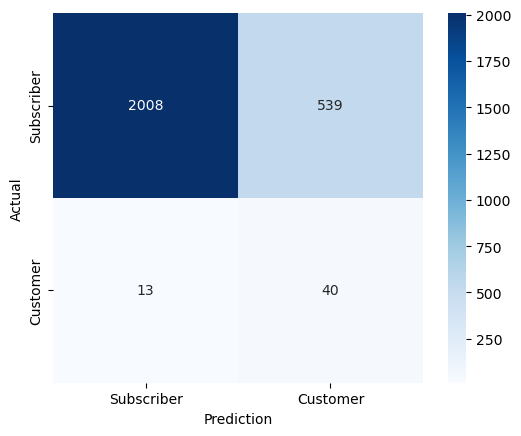

In [103]:
make_confusion_matrix(logreg3, threshold=0.47)

In [104]:
logreg3_threshold = 0.47
y_pred = (logreg3.predict_proba(x_test_scaled)[:,1] >= logreg3_threshold)

logreg3_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
logreg3_scores.index = ["logreg3"]
logreg3_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

logreg3_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
logreg3,0.787692,0.754717,0.069085,0.126582,0.771548


In [105]:
knn3 = KNeighborsClassifier()
knn3.fit(x_smoted, y_smoted)

knn3.score(x_test_scaled, y_test)

0.9315384615384615

In [106]:
interactive(lambda threshold: make_confusion_matrix(knn3, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

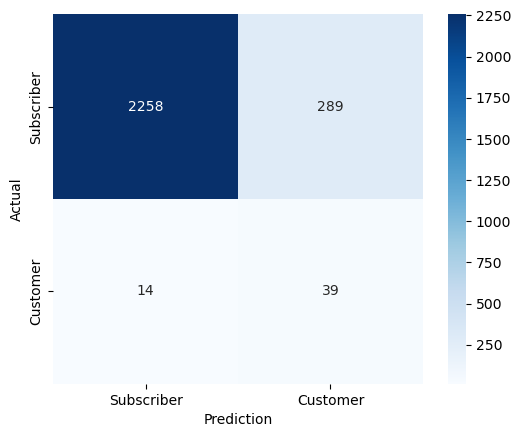

In [107]:
make_confusion_matrix(knn3, threshold=0.2)

In [108]:
knn3_threshold = 0.2
y_pred = (knn3.predict_proba(x_test_scaled)[:,1] >= knn3_threshold)

knn3_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
knn3_scores.index = ["knn3"]
knn3_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

knn3_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
knn3,0.883462,0.735849,0.118902,0.204724,0.811191


In [109]:
dt3 = DecisionTreeClassifier()
dt3.fit(x_smoted, y_smoted)

dt3.score(x_test_scaled, y_test)

0.9626923076923077

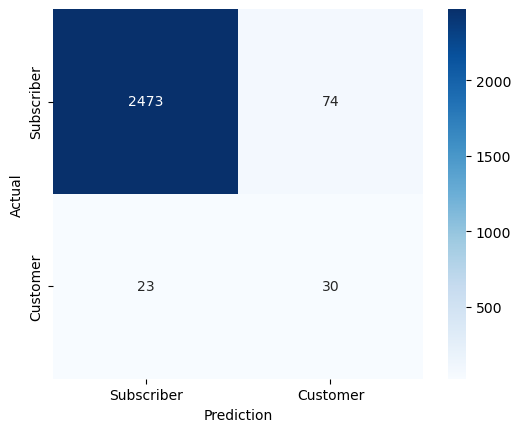

In [110]:
make_confusion_matrix(dt3)

In [111]:
y_pred = (dt3.predict_proba(x_test_scaled)[:,1])

dt3_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
dt3_scores.index = ["dt3"]
dt3_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

dt3_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
dt3,0.962692,0.566038,0.288462,0.382166,0.768492


In [112]:
rf3 = RandomForestClassifier()
rf3.fit(x_smoted, y_smoted)

rf3.score(x_test_scaled, y_test)

0.98

In [113]:
interactive(lambda threshold: make_confusion_matrix(rf3, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

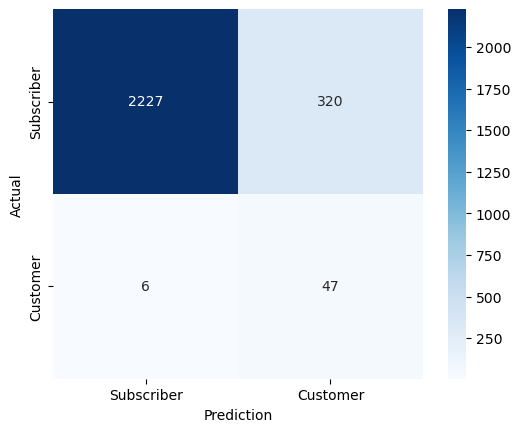

In [114]:
make_confusion_matrix(rf3, threshold=0.1)

In [115]:
rf3_threshold = 0.1
y_pred = (rf3.predict_proba(x_test_scaled)[:,1] >= rf3_threshold)

rf3_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
rf3_scores.index = ["rf3"]
rf3_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

rf3_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
rf3,0.874615,0.886792,0.128065,0.22381,0.880577


In [116]:
xgboost3 = XGBClassifier()
xgboost3.fit(x_smoted, y_smoted)

xgboost3.score(x_test_scaled, y_test)

0.9807692307692307

In [117]:
interactive(lambda threshold: make_confusion_matrix(xgboost3, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

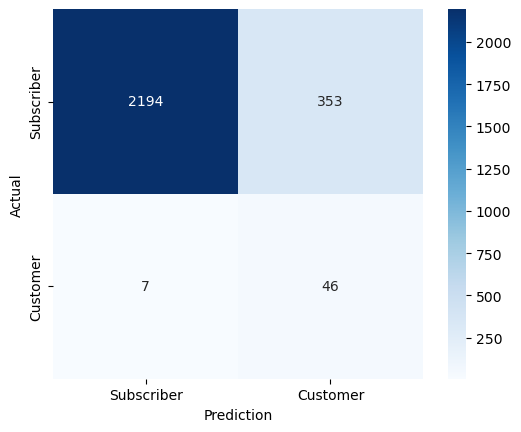

In [118]:
make_confusion_matrix(xgboost3, threshold=0.01)

In [119]:
xgboost3_threshold = 0.01
y_pred = (xgboost3.predict_proba(x_test_scaled)[:,1] >= xgboost3_threshold)

xgboost3_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
xgboost3_scores.index = ["xgboost3"]
xgboost3_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

xgboost3_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
xgboost3,0.861538,0.867925,0.115288,0.20354,0.864665


## Modelling after ADASYN

In [120]:
from imblearn.over_sampling import ADASYN
x_adasyn, y_adasyn = ADASYN().fit_resample(x_train_scaled, y_train)

In [121]:
Counter(y_adasyn)

Counter({0: 10178, 1: 10233})

**1. Cross Validation Accuracy Scores after ADASYN**

In [122]:
logreg4 = LogisticRegression(solver='liblinear')

acc_logreg4 = cross_val_score(logreg4, x_adasyn, y_adasyn, cv=5, scoring='accuracy')
acc_logreg4

array([0.81116826, 0.70235179, 0.80524253, 0.75943165, 0.78417442])

In [123]:
knn4 = KNeighborsClassifier()

acc_knn4 = cross_val_score(knn4, x_adasyn, y_adasyn, cv=5, scoring='accuracy')
acc_knn4

array([0.93142297, 0.94071534, 0.93042626, 0.93042626, 0.92871142])

In [124]:
dt4 = DecisionTreeClassifier() 

acc_dt4 = cross_val_score(dt4, x_adasyn, y_adasyn, cv=5, scoring='accuracy')
acc_dt4

array([0.91109478, 0.92601666, 0.94536992, 0.9311612 , 0.92748653])

In [125]:
rf4 = RandomForestClassifier()

acc_rf4 = cross_val_score(rf4, x_adasyn, y_adasyn, cv=5, scoring='accuracy')
acc_rf4

array([0.95566985, 0.96815287, 0.97599216, 0.96398824, 0.94830965])

In [126]:
xgboost4 = XGBClassifier()

acc_xgboost4 = cross_val_score(xgboost4, x_adasyn, y_adasyn, cv=5, scoring='accuracy')
acc_xgboost4

array([0.97575312, 0.98848604, 0.99289564, 0.99142577, 0.99044586])

In [127]:
results4 = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Cross Validated Score (Mean)': [acc_logreg4.mean(), acc_knn4.mean(),
                                     acc_dt4.mean(), acc_rf4.mean(), acc_xgboost4.mean()],
    'Cross Validated Score (Std)': [acc_logreg4.std(), acc_knn4.std(),
                                     acc_dt4.std(), acc_rf4.std(), acc_xgboost4.std()]})

result_df4 = results4.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df4 = result_df4.set_index('Model')
result_df4['Cross Validated Score (Mean)'] = (result_df4['Cross Validated Score (Mean)']*100).round(2)
result_df4['Cross Validated Score (Std)'] = (result_df4['Cross Validated Score (Std)']*100).round(2)
result_df4

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
XGBoost,98.78,0.62
Random Forest,96.24,0.96
KNN,93.23,0.43
Decision Tree,92.82,1.10
Logistic Regression,77.25,3.95


**2. Testing Confussion Matrices after ADASYN**

In [128]:
logreg4 = LogisticRegression(solver='liblinear')
logreg4.fit(x_adasyn, y_adasyn)

logreg4.score(x_test_scaled, y_test)

0.7996153846153846

In [129]:
interactive(lambda threshold: make_confusion_matrix(logreg4, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

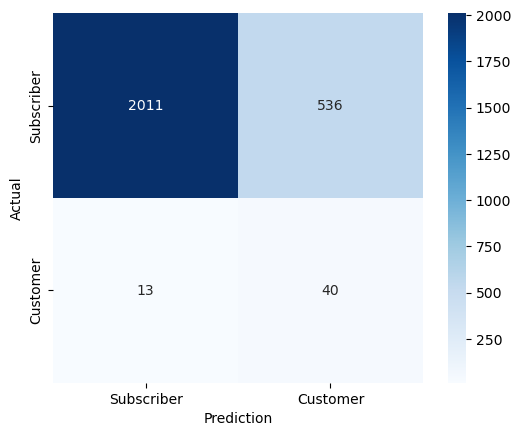

In [130]:
make_confusion_matrix(logreg4, threshold=0.49)

In [131]:
logreg4_threshold = 0.49
y_pred = (logreg4.predict_proba(x_test_scaled)[:,1] >= logreg4_threshold)

logreg4_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
logreg4_scores.index = ["logreg4"]
logreg4_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

logreg4_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
logreg4,0.788846,0.754717,0.069444,0.127186,0.772137


In [132]:
knn4 = KNeighborsClassifier()
knn4.fit(x_adasyn, y_adasyn)

knn4.score(x_test_scaled, y_test)

0.9257692307692308

In [133]:
interactive(lambda threshold: make_confusion_matrix(knn4, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

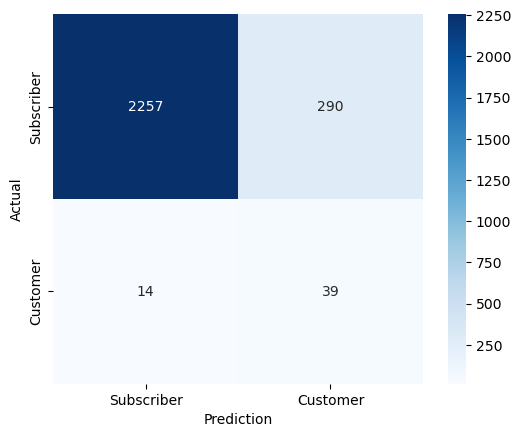

In [134]:
make_confusion_matrix(knn4, threshold=0.2)

In [135]:
knn4_threshold = 0.2
y_pred = (knn4.predict_proba(x_test_scaled)[:,1] >= knn4_threshold)

knn4_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
knn4_scores.index = ["knn4"]
knn4_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

knn4_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
knn4,0.883077,0.735849,0.118541,0.204188,0.810995


In [136]:
dt4 = DecisionTreeClassifier()
dt4.fit(x_adasyn, y_adasyn)

dt4.score(x_test_scaled, y_test)

0.9661538461538461

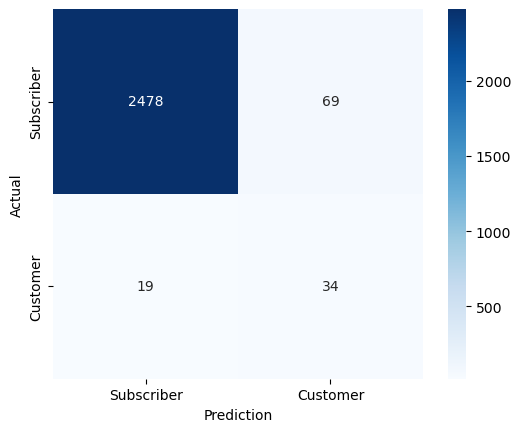

In [137]:
make_confusion_matrix(dt4)

In [138]:
y_pred = (dt4.predict_proba(x_test_scaled)[:,1])

dt4_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
dt4_scores.index = ["dt4"]
dt4_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

dt4_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
dt4,0.966154,0.641509,0.330097,0.435897,0.807209


In [139]:
rf4 = RandomForestClassifier()
rf4.fit(x_adasyn, y_adasyn)

rf4.score(x_test_scaled, y_test)

0.9792307692307692

In [140]:
interactive(lambda threshold: make_confusion_matrix(rf4, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

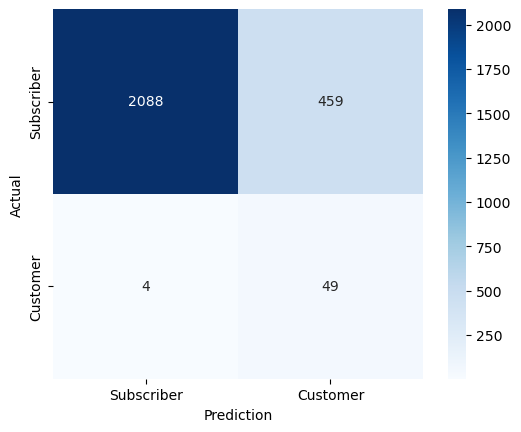

In [141]:
make_confusion_matrix(rf4, threshold=0.07)

In [142]:
rf4_threshold = 0.07
y_pred = (rf4.predict_proba(x_test_scaled)[:,1] >= rf4_threshold)

rf4_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
rf4_scores.index = ["rf4"]
rf4_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

rf4_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
rf4,0.821923,0.924528,0.096457,0.174688,0.872158


In [143]:
xgboost4 = XGBClassifier()
xgboost4.fit(x_adasyn, y_adasyn)

xgboost4.score(x_test_scaled, y_test)

0.9811538461538462

In [144]:
interactive(lambda threshold: make_confusion_matrix(xgboost4, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

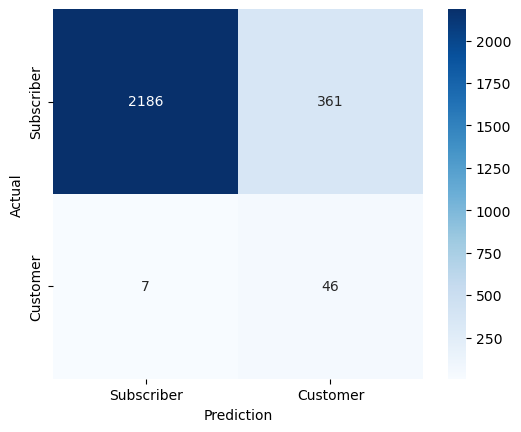

In [145]:
make_confusion_matrix(xgboost4, threshold=0.01)

In [146]:
xgboost4_threshold = 0.01
y_pred = (xgboost4.predict_proba(x_test_scaled)[:,1] >= xgboost4_threshold)

xgboost4_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
xgboost4_scores.index = ["xgboost4"]
xgboost4_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

xgboost4_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
xgboost4,0.858462,0.867925,0.113022,0.2,0.863095


## Modelling after Borderline-SMOTE

In [147]:
from imblearn.over_sampling import BorderlineSMOTE
x_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(x_train_scaled, y_train)

In [148]:
Counter(y_blsmote)

Counter({0: 10178, 1: 10178})

**1. Cross Validation Accuracy Scores after Borderline-SMOTE**

In [149]:
logreg5 = LogisticRegression(solver='liblinear')

acc_logreg5 = cross_val_score(logreg5, x_blsmote, y_blsmote, cv=5, scoring='accuracy')
acc_logreg5

array([0.86222986, 0.8639155 , 0.86121346, 0.85605502, 0.86096782])

In [150]:
knn5 = KNeighborsClassifier()

acc_knn5 = cross_val_score(knn5, x_blsmote, y_blsmote, cv=5, scoring='accuracy')
acc_knn5

array([0.97003929, 0.98034881, 0.98157701, 0.98182265, 0.97789241])

In [151]:
dt5 = DecisionTreeClassifier() 

acc_dt5 = cross_val_score(dt5, x_blsmote, y_blsmote, cv=5, scoring='accuracy')
acc_dt5

array([0.97421415, 0.98477033, 0.98501597, 0.98747237, 0.98575289])

In [152]:
rf5 = RandomForestClassifier()

acc_rf5 = cross_val_score(rf5, x_blsmote, y_blsmote, cv=5, scoring='accuracy')
acc_rf5

array([0.9796169 , 0.99705232, 0.99705232, 0.9975436 , 0.9963154 ])

In [153]:
xgboost5 = XGBClassifier()

acc_xgboost5 = cross_val_score(xgboost5, x_blsmote, y_blsmote, cv=5, scoring='accuracy')
acc_xgboost5

array([0.98084479, 0.99656104, 0.99484156, 0.99803488, 0.99582412])

In [154]:
results5 = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Cross Validated Score (Mean)': [acc_logreg5.mean(), acc_knn5.mean(),
                                     acc_dt5.mean(), acc_rf5.mean(), acc_xgboost5.mean()],
    'Cross Validated Score (Std)': [acc_logreg5.std(), acc_knn5.std(),
                                     acc_dt5.std(), acc_rf5.std(), acc_xgboost5.std()]})

result_df5 = results5.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df5 = result_df5.set_index('Model')
result_df5['Cross Validated Score (Mean)'] = (result_df5['Cross Validated Score (Mean)']*100).round(2)
result_df5['Cross Validated Score (Std)'] = (result_df5['Cross Validated Score (Std)']*100).round(2)
result_df5

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Random Forest,99.35,0.70
XGBoost,99.32,0.63
Decision Tree,98.34,0.47
KNN,97.83,0.44
Logistic Regression,86.09,0.26


**2. Testing Confussion Matrices after Borderline-SMOTE**

In [155]:
logreg5 = LogisticRegression(solver='liblinear')
logreg5.fit(x_blsmote, y_blsmote)

logreg5.score(x_test_scaled, y_test)

0.8480769230769231

In [156]:
interactive(lambda threshold: make_confusion_matrix(logreg5, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

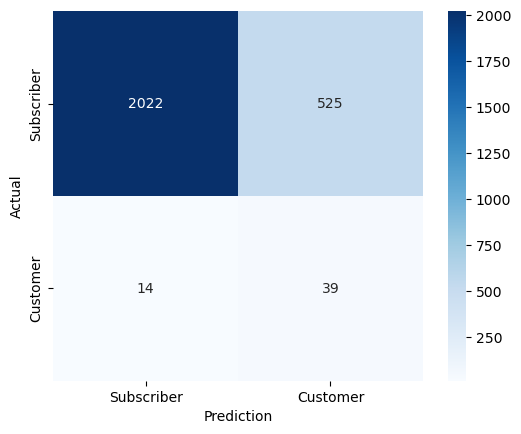

In [157]:
make_confusion_matrix(logreg5, threshold=0.42)

In [158]:
logreg5_threshold = 0.42
y_pred = (logreg5.predict_proba(x_test_scaled)[:,1] >= logreg5_threshold)

logreg5_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
logreg5_scores.index = ["logreg5"]
logreg5_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

logreg5_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
logreg5,0.792692,0.735849,0.069149,0.126418,0.764862


In [159]:
knn5 = KNeighborsClassifier()
knn5.fit(x_blsmote, y_blsmote)

knn5.score(x_test_scaled, y_test)

0.9557692307692308

In [160]:
interactive(lambda threshold: make_confusion_matrix(knn5, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

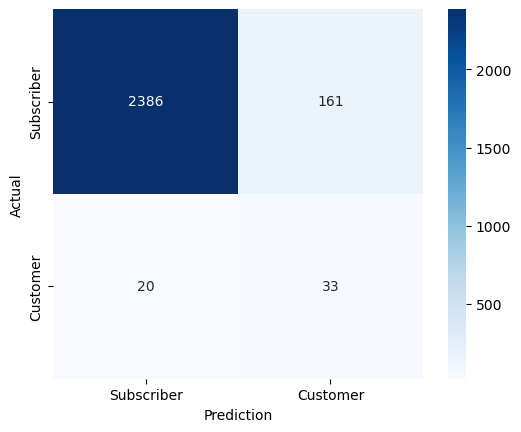

In [161]:
make_confusion_matrix(knn5, threshold=0.2)

In [162]:
knn5_threshold = 0.2
y_pred = (knn5.predict_proba(x_test_scaled)[:,1] >= knn5_threshold)

knn5_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
knn5_scores.index = ["knn5"]
knn5_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

knn5_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
knn5,0.930385,0.622642,0.170103,0.267206,0.779715


In [163]:
dt5 = DecisionTreeClassifier()
dt5.fit(x_blsmote, y_blsmote)

dt5.score(x_test_scaled, y_test)

0.9726923076923077

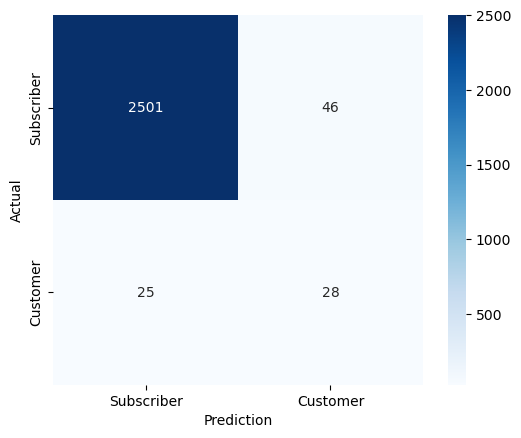

In [164]:
make_confusion_matrix(dt5)

In [165]:
y_pred = (dt5.predict_proba(x_test_scaled)[:,1])

dt5_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
dt5_scores.index = ["dt5"]
dt5_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

dt5_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
dt5,0.972692,0.528302,0.378378,0.440945,0.755121


In [166]:
rf5 = RandomForestClassifier()
rf5.fit(x_blsmote, y_blsmote)

rf5.score(x_test_scaled, y_test)

0.9819230769230769

In [167]:
interactive(lambda threshold: make_confusion_matrix(rf5, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

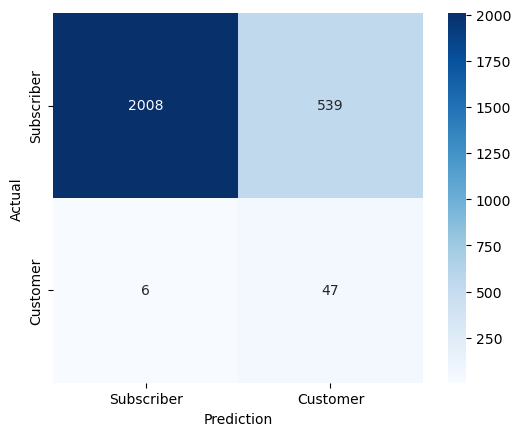

In [168]:
make_confusion_matrix(rf5, threshold=0.03)

In [169]:
rf5_threshold = 0.03
y_pred = (rf5.predict_proba(x_test_scaled)[:,1] >= rf5_threshold)

rf5_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
rf5_scores.index = ["rf5"]
rf5_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

rf5_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
rf5,0.790385,0.886792,0.080205,0.147105,0.837585


In [170]:
xgboost5 = XGBClassifier()
xgboost5.fit(x_blsmote, y_blsmote)

xgboost5.score(x_test_scaled, y_test)

0.9811538461538462

In [171]:
interactive(lambda threshold: make_confusion_matrix(xgboost5, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

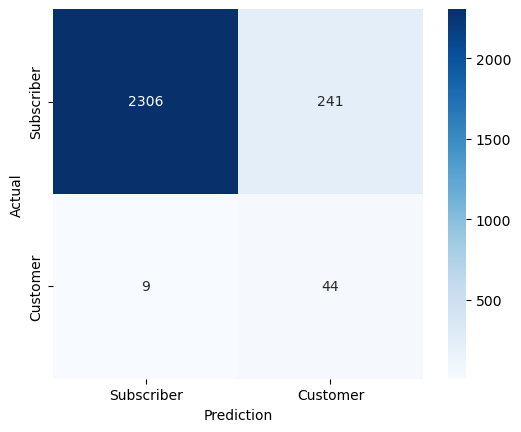

In [172]:
make_confusion_matrix(xgboost5, threshold=0.01)

In [173]:
xgboost5_threshold = 0.01
y_pred = (xgboost5.predict_proba(x_test_scaled)[:,1] >= xgboost5_threshold)

xgboost5_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
xgboost5_scores.index = ["xgboost5"]
xgboost5_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

xgboost5_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
xgboost5,0.903846,0.830189,0.154386,0.260355,0.867784


## Modelling after Random Undersampling

In [174]:
from imblearn.under_sampling import RandomUnderSampler
x_under, y_under = RandomUnderSampler().fit_resample(x_train_scaled, y_train)

In [175]:
Counter(y_under)

Counter({0: 222, 1: 222})

**1. Cross Validation Accuracy Scores after Random Undersampling**

In [176]:
logreg6 = LogisticRegression(solver='liblinear')

acc_logreg6 = cross_val_score(logreg6, x_under, y_under, cv=5, scoring='accuracy')
acc_logreg6

array([0.79775281, 0.71910112, 0.80898876, 0.7752809 , 0.85227273])

In [177]:
knn6 = KNeighborsClassifier()

acc_knn6 = cross_val_score(knn6, x_under, y_under, cv=5, scoring='accuracy')
acc_knn6

array([0.74157303, 0.74157303, 0.79775281, 0.71910112, 0.81818182])

In [178]:
dt6 = DecisionTreeClassifier() 

acc_dt6 = cross_val_score(dt6, x_under, y_under, cv=5, scoring='accuracy')
acc_dt6

array([0.82022472, 0.73033708, 0.79775281, 0.85393258, 0.84090909])

In [179]:
rf6 = RandomForestClassifier()

acc_rf6 = cross_val_score(rf6, x_under, y_under, cv=5, scoring='accuracy')
acc_rf6

array([0.80898876, 0.86516854, 0.83146067, 0.86516854, 0.89772727])

In [180]:
xgboost6 = XGBClassifier()

acc_xgboost6 = cross_val_score(xgboost6, x_under, y_under, cv=5, scoring='accuracy')
acc_xgboost6

array([0.83146067, 0.85393258, 0.85393258, 0.83146067, 0.89772727])

In [181]:
results6 = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Cross Validated Score (Mean)': [acc_logreg6.mean(), acc_knn6.mean(),
                                     acc_dt6.mean(), acc_rf6.mean(), acc_xgboost6.mean()],
    'Cross Validated Score (Std)': [acc_logreg6.std(), acc_knn6.std(),
                                     acc_dt6.std(), acc_rf6.std(), acc_xgboost6.std()]})

result_df6 = results6.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df6 = result_df6.set_index('Model')
result_df6['Cross Validated Score (Mean)'] = (result_df6['Cross Validated Score (Mean)']*100).round(2)
result_df6['Cross Validated Score (Std)'] = (result_df6['Cross Validated Score (Std)']*100).round(2)
result_df6

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Random Forest,85.37,3.06
XGBoost,85.37,2.42
Decision Tree,80.86,4.35
Logistic Regression,79.07,4.37
KNN,76.36,3.77


**2. Testing Confussion Matrices after Random Undersampling**

In [182]:
logreg6 = LogisticRegression(solver='liblinear')
logreg6.fit(x_under, y_under)

logreg6.score(x_test_scaled, y_test)

0.808076923076923

In [183]:
interactive(lambda threshold: make_confusion_matrix(logreg6, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

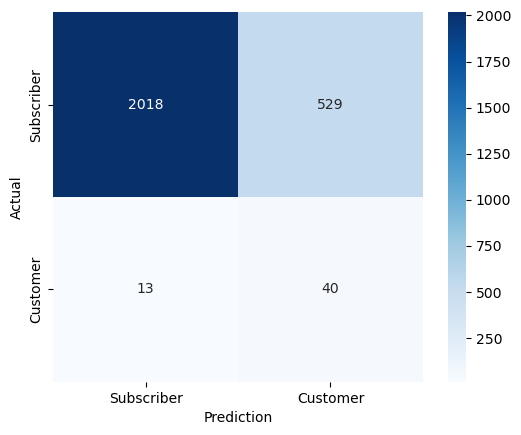

In [184]:
make_confusion_matrix(logreg6, threshold=0.48)

In [185]:
logreg6_threshold = 0.48
y_pred = (logreg6.predict_proba(x_test_scaled)[:,1] >= logreg6_threshold)

logreg6_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
logreg6_scores.index = ["logreg6"]
logreg6_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

logreg6_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
logreg6,0.791538,0.754717,0.070299,0.128617,0.773511


In [186]:
knn6 = KNeighborsClassifier()
knn6.fit(x_under, y_under)

knn6.score(x_test_scaled, y_test)

0.7996153846153846

In [187]:
interactive(lambda threshold: make_confusion_matrix(knn6, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

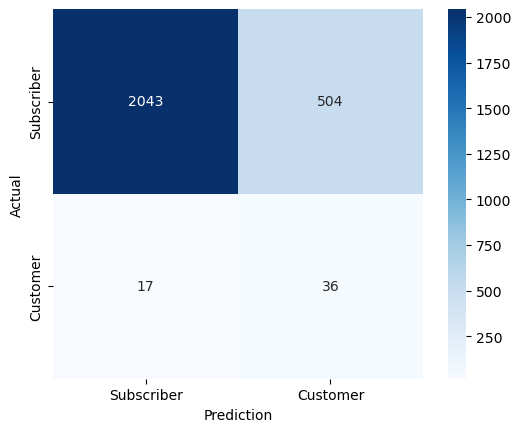

In [188]:
make_confusion_matrix(knn6, threshold=0.41)

In [189]:
knn6_threshold = 0.41
y_pred = (knn6.predict_proba(x_test_scaled)[:,1] >= knn6_threshold)

knn6_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
knn6_scores.index = ["knn6"]
knn6_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

knn6_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
knn6,0.799615,0.679245,0.066667,0.121417,0.740683


In [190]:
dt6 = DecisionTreeClassifier()
dt6.fit(x_under, y_under)

dt6.score(x_test_scaled, y_test)

0.7819230769230769

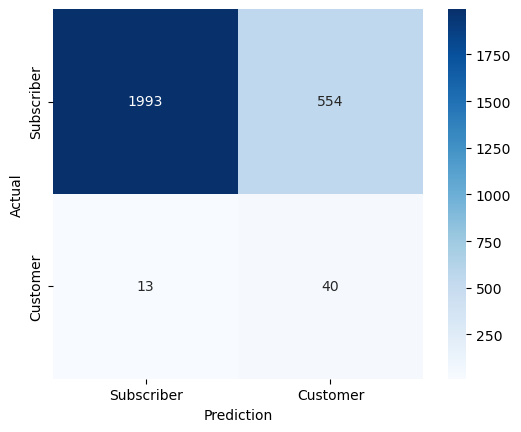

In [191]:
make_confusion_matrix(dt6)

In [192]:
y_pred = (dt6.predict_proba(x_test_scaled)[:,1])

dt6_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
dt6_scores.index = ["dt6"]
dt6_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

dt6_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
dt6,0.781923,0.754717,0.06734,0.123648,0.768603


In [193]:
rf6 = RandomForestClassifier()
rf6.fit(x_under, y_under)

rf6.score(x_test_scaled, y_test)

0.8542307692307692

In [194]:
interactive(lambda threshold: make_confusion_matrix(rf6, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

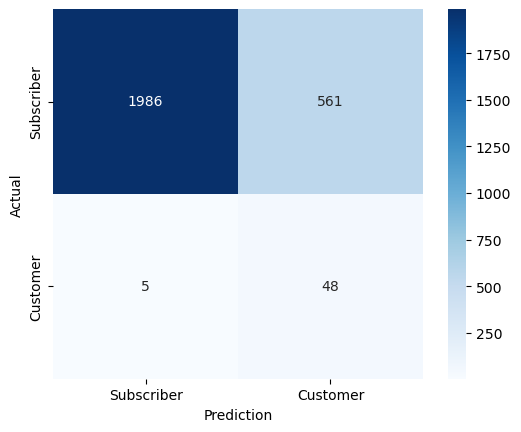

In [195]:
make_confusion_matrix(rf6, threshold=0.41)

In [196]:
rf6_threshold = 0.41
y_pred = (rf6.predict_proba(x_test_scaled)[:,1] >= rf6_threshold)

rf6_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
rf6_scores.index = ["rf6"]
rf6_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

rf6_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
rf6,0.782308,0.90566,0.078818,0.145015,0.842701


In [197]:
xgboost6 = XGBClassifier()
xgboost6.fit(x_under, y_under)

xgboost6.score(x_test_scaled, y_test)

0.8442307692307692

In [198]:
interactive(lambda threshold: make_confusion_matrix(xgboost6, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

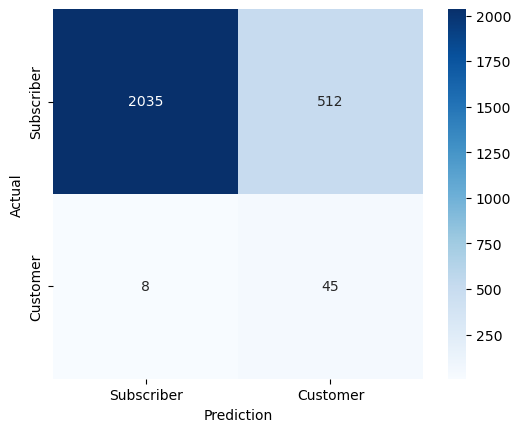

In [199]:
make_confusion_matrix(xgboost6, threshold=0.33)

In [200]:
xgboost6_threshold = 0.33
y_pred = (xgboost6.predict_proba(x_test_scaled)[:,1] >= xgboost6_threshold)

xgboost6_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
xgboost6_scores.index = ["xgboost6"]
xgboost6_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

xgboost6_scores

,Accuracy,Recall,Precision,F1 Score,AUC Score
xgboost6,0.8,0.849057,0.08079,0.147541,0.824018


# Model Selection

In [201]:
all_scores = pd.concat([logreg_scores, knn_scores, dt_scores, rf_scores, xgboost_scores,
                        logreg2_scores, knn2_scores, dt2_scores, rf2_scores, xgboost2_scores,
                        logreg3_scores, knn3_scores, dt3_scores, rf3_scores, xgboost3_scores,
                        logreg4_scores, knn4_scores, dt4_scores, rf4_scores, xgboost4_scores,
                        logreg5_scores, knn5_scores, dt5_scores, rf5_scores, xgboost5_scores,
                        logreg6_scores, knn6_scores, dt6_scores, rf6_scores, xgboost6_scores])
all_scores = all_scores.sort_values(by='Recall', ascending=False)
best_scores = all_scores[all_scores['Recall'] > 0.75].sort_values(by='Precision', ascending=False)
best_scores.head(5)

,Accuracy,Recall,Precision,F1 Score,AUC Score
xgboost2,0.906538,0.811321,0.155797,0.261398,0.859920
xgboost5,0.903846,0.830189,0.154386,0.260355,0.867784
rf3,0.874615,0.886792,0.128065,0.223810,0.880577
xgboost3,0.861538,0.867925,0.115288,0.203540,0.864665
xgboost4,0.858462,0.867925,0.113022,0.200000,0.863095


In [202]:
interactive(lambda threshold: make_confusion_matrix(xgboost2, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [203]:
interactive(lambda threshold: make_confusion_matrix(xgboost5, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [204]:
interactive(lambda threshold: make_confusion_matrix(rf3, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

# Explainable AI

In [205]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [206]:
shap.initjs()

In [207]:
shap_explainer = shap.Explainer(rf3)
shap_values = shap_explainer.shap_values(x_test)

## Global Explainability

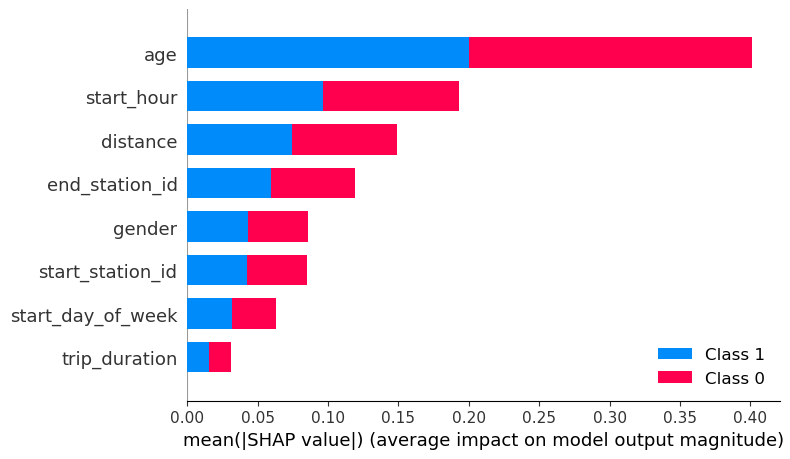

In [208]:
shap.summary_plot(shap_values, x_test)

## Local Explainability

In [209]:
shap.force_plot(shap_explainer.expected_value[1], shap_values[1][0, :], x_test.iloc[0, :])

# Prediction

In [210]:
test_scaled = std_scale.transform(test)
new_pred = rf3.predict(test_scaled)

In [211]:
test["Prediction"] = new_pred # Yaptığımız tahminleri DataFrame'e ekleme
test["Prediction"] = test["Prediction"].apply(lambda x: str(x).replace("0","Subscriber"))
test["Prediction"] = test["Prediction"].apply(lambda x: str(x).replace("1","Customer"))
test

,trip_duration,start_station_id,end_station_id,age,gender,start_hour,start_day_of_week,distance,Prediction
0,184,3269,3211,40,1,11,4,606,Subscriber
1,17986,3269,3203,34,0,12,4,547,Subscriber
2,236,3269,3203,53,0,12,4,547,Subscriber
3,232,3269,3186,38,0,15,4,941,Subscriber
4,693,3269,3195,33,1,18,4,1247,Subscriber
...,...,...,...,...,...,...,...,...,...
6671,853,3694,3183,46,0,6,5,3881,Subscriber
6672,936,3694,3183,46,0,6,6,3881,Subscriber
6673,653,3694,3677,25,1,21,6,1940,Subscriber
6674,960,3694,3183,46,0,6,1,3881,Subscriber


In [212]:
test.Prediction.value_counts()

Subscriber    6538
Customer       138
Name: Prediction, dtype: int64

In [213]:
from joblib import dump, load

dump(rf3, 'rf_model.pkl')

['rf_model.pkl']